<a href="https://colab.research.google.com/github/Yugsolanki/Vector_Image_Search/blob/main/Vector_Image_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install chromadb open-clip-torch -q

In [ ]:
!kaggle datasets download prasunroy/natural-images -q

Dataset URL: https://www.kaggle.com/datasets/prasunroy/natural-images
License(s): CC-BY-NC-SA-4.0


In [ ]:
!unzip /content/natural-images.zip

In [ ]:
import chromadb
from chromadb.utils.data_loaders import ImageLoader
from PIL import Image
import numpy as np
from sentence_transformers import SentenceTransformer
from chromadb.utils.embedding_functions import OpenCLIPEmbeddingFunction
import os

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [ ]:
embedding_function = OpenCLIPEmbeddingFunction()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


open_clip_pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

In [ ]:
data_loader = ImageLoader()

In [ ]:
client = chromadb.Client()

In [ ]:
def load_image_as_numpy(image_path):
    img = Image.open(image_path)
    img = img.resize((224, 224))
    img_array = np.array(img)
    return img_array

def numpy_to_pil(img_array):
    img = Image.fromarray(img_array)
    return img

In [ ]:
folders = os.listdir('/content/natural_images')
print(folders)

['motorbike', 'dog', 'flower', 'car', 'person', 'fruit', 'airplane', 'cat']


In [ ]:
# move one images from each folder and store in a different folder for test

os.makedirs('/content/test', exist_ok=True)

for folder in folders:
  for image in os.listdir(f'/content/natural_images/{folder}'):
    os.rename(f'/content/natural_images/{folder}/{image}', f'/content/test/{image}')
    break

In [ ]:
array_of_images = []

for folder in folders:
  for image in os.listdir(f'/content/natural_images/{folder}'):
    img = load_image_as_numpy(f'/content/natural_images/{folder}/{image}')
    array_of_images.append(img)

In [ ]:
print(len(array_of_images), array_of_images[0].shape)

6899 (224, 224, 3)


In [ ]:
collection = client.get_or_create_collection(
    name="multimodel",
    data_loader=data_loader,
    embedding_function=embedding_function
)

In [ ]:
ids = [f'img{idx}' for idx in range(len(array_of_images))]

In [ ]:
print(len(ids))

6899


In [ ]:
collection.add(
  images=array_of_images,
  ids=ids
)

In [ ]:
imgs_to_search = [load_image_as_numpy(f'/content/test/{imgt}') for imgt in os.listdir('/content/test')]

In [99]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display images in a grid with the query image at the start
def display_image_grid(query_img, result_images, cols=5, title="Query Results"):
    # Determine the number of rows needed
    total_images = len(result_images) + 1  # +1 for the query image
    rows = (total_images + cols - 1) // cols  # Calculate rows needed

    # Create the figure and axes
    fig, axes = plt.subplots(rows, cols, figsize=(15, 6))
    fig.suptitle(title, fontsize=16)

    # Flatten the axes array for easy 1D indexing
    axes = axes.ravel() if rows > 1 else np.array([axes])

    # Display the query image in the first position
    axes[0].imshow(query_img)
    axes[0].set_title("Query Image")
    axes[0].axis("off")

    # Display the result images in the remaining grid positions
    for i, img in enumerate(result_images):
        ax = axes[i + 1]  # Offset by 1 to account for the query image
        ax.imshow(img)
        ax.axis("off")

    # Hide any unused subplots
    for j in range(len(result_images) + 1, rows * cols):
        axes[j].axis("off")

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

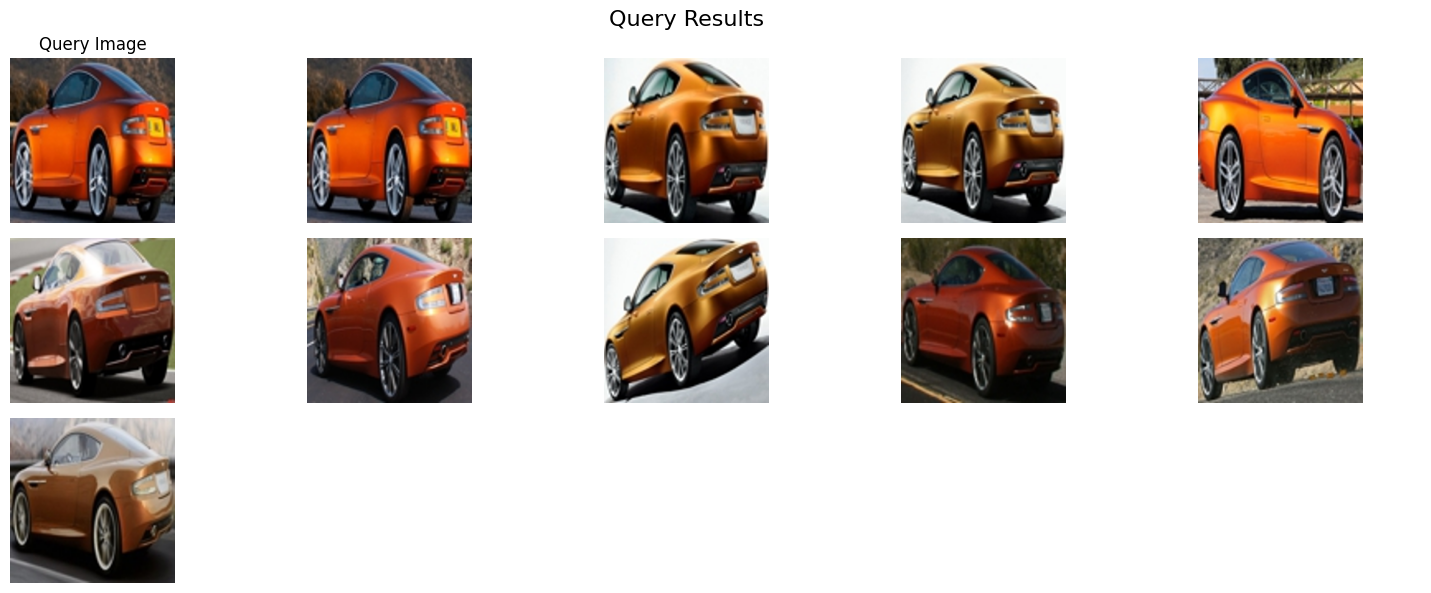

In [100]:
query_img = imgs_to_search[0]
query_img_pil = numpy_to_pil(query_img)

result = collection.query(
    query_images=[query_img],
    n_results=10
)

images_to_display = []
for img_id in result['ids'][0]:
    idx = int(img_id[3:])
    img_array = array_of_images[idx]
    img_pil = numpy_to_pil(img_array)
    images_to_display.append(img_pil)

display_image_grid(query_img_pil, images_to_display, cols=5, title="Query Results")

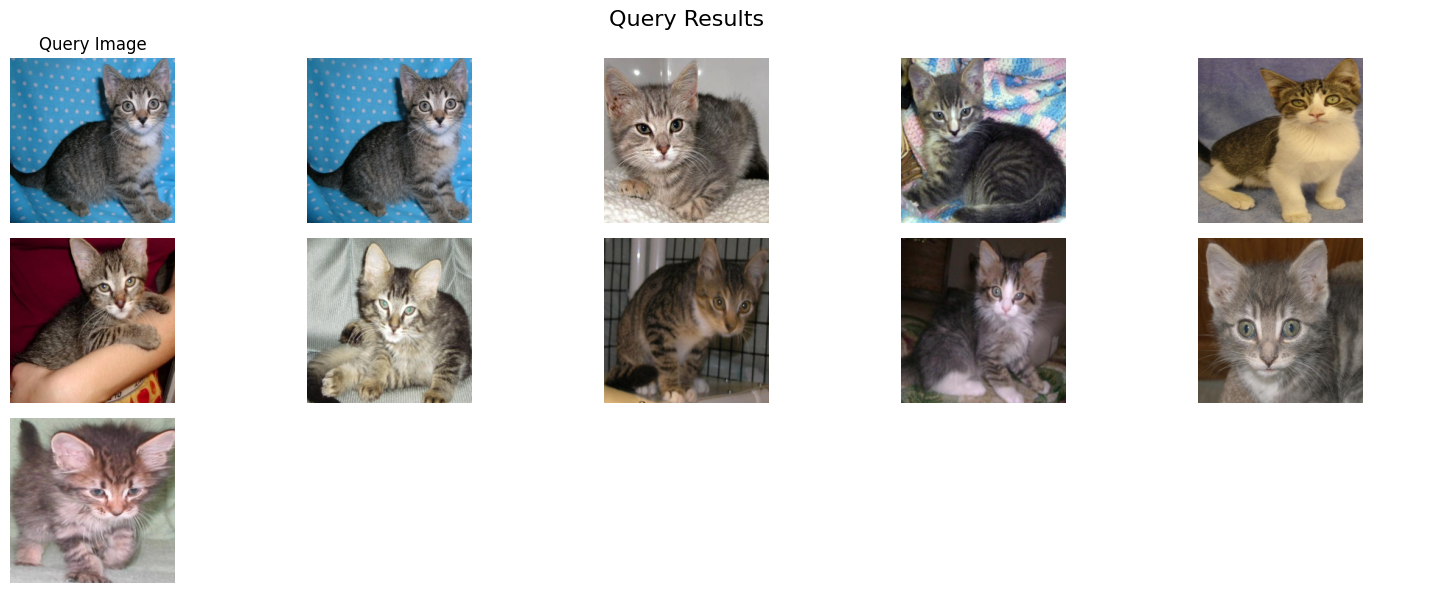

In [101]:
query_img = imgs_to_search[1]
query_img_pil = numpy_to_pil(query_img)

result = collection.query(
    query_images=[query_img],
    n_results=10
)

images_to_display = []
for img_id in result['ids'][0]:
    idx = int(img_id[3:])
    img_array = array_of_images[idx]
    img_pil = numpy_to_pil(img_array)
    images_to_display.append(img_pil)

display_image_grid(query_img_pil, images_to_display, cols=5, title="Query Results")

In [102]:
query_img = imgs_to_search[2]
query_img_pil = numpy_to_pil(query_img)

result = collection.query(
    query_images=[query_img],
    n_results=10
)

images_to_display = []
for img_id in result['ids'][0]:
    idx = int(img_id[3:])
    img_array = array_of_images[idx]
    img_pil = numpy_to_pil(img_array)
    images_to_display.append(img_pil)

display_image_grid(query_img_pil, images_to_display, cols=5, title="Query Results")

In [103]:
query_img = imgs_to_search[3]
query_img_pil = numpy_to_pil(query_img)

result = collection.query(
    query_images=[query_img],
    n_results=10
)

images_to_display = []
for img_id in result['ids'][0]:
    idx = int(img_id[3:])
    img_array = array_of_images[idx]
    img_pil = numpy_to_pil(img_array)
    images_to_display.append(img_pil)

display_image_grid(query_img_pil, images_to_display, cols=5, title="Query Results")

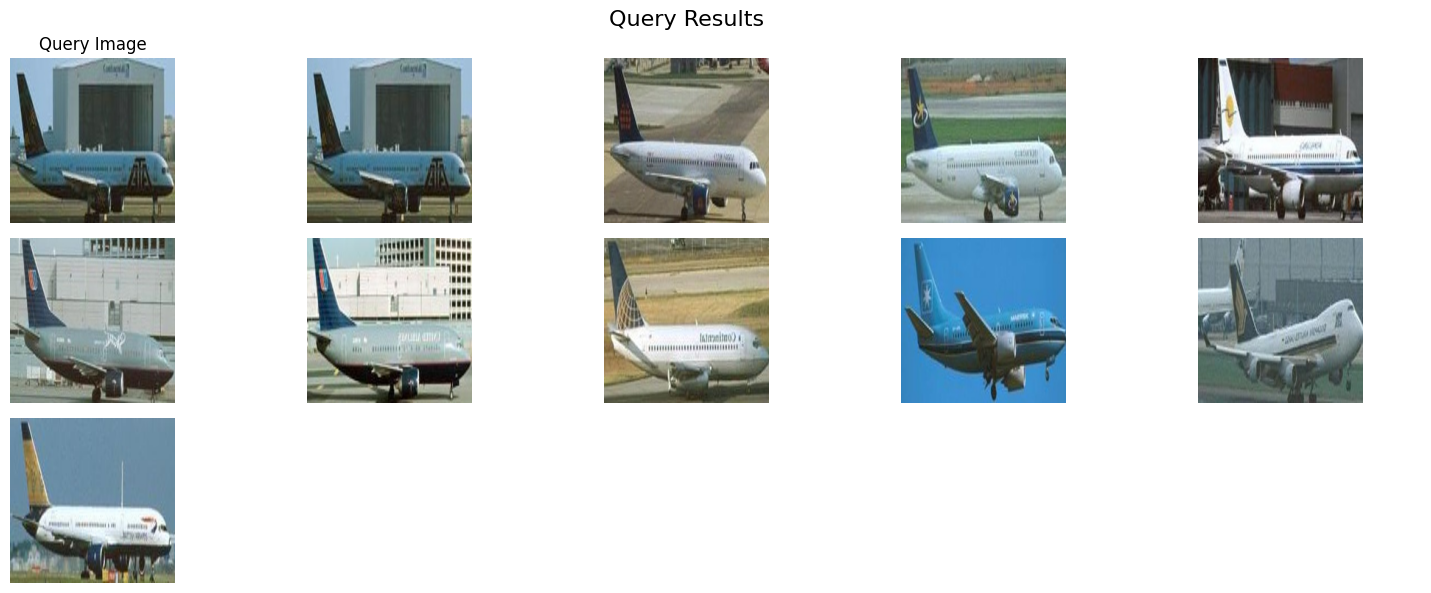

In [104]:
query_img = imgs_to_search[4]
query_img_pil = numpy_to_pil(query_img)

result = collection.query(
    query_images=[query_img],
    n_results=10
)

images_to_display = []
for img_id in result['ids'][0]:
    idx = int(img_id[3:])
    img_array = array_of_images[idx]
    img_pil = numpy_to_pil(img_array)
    images_to_display.append(img_pil)

display_image_grid(query_img_pil, images_to_display, cols=5, title="Query Results")

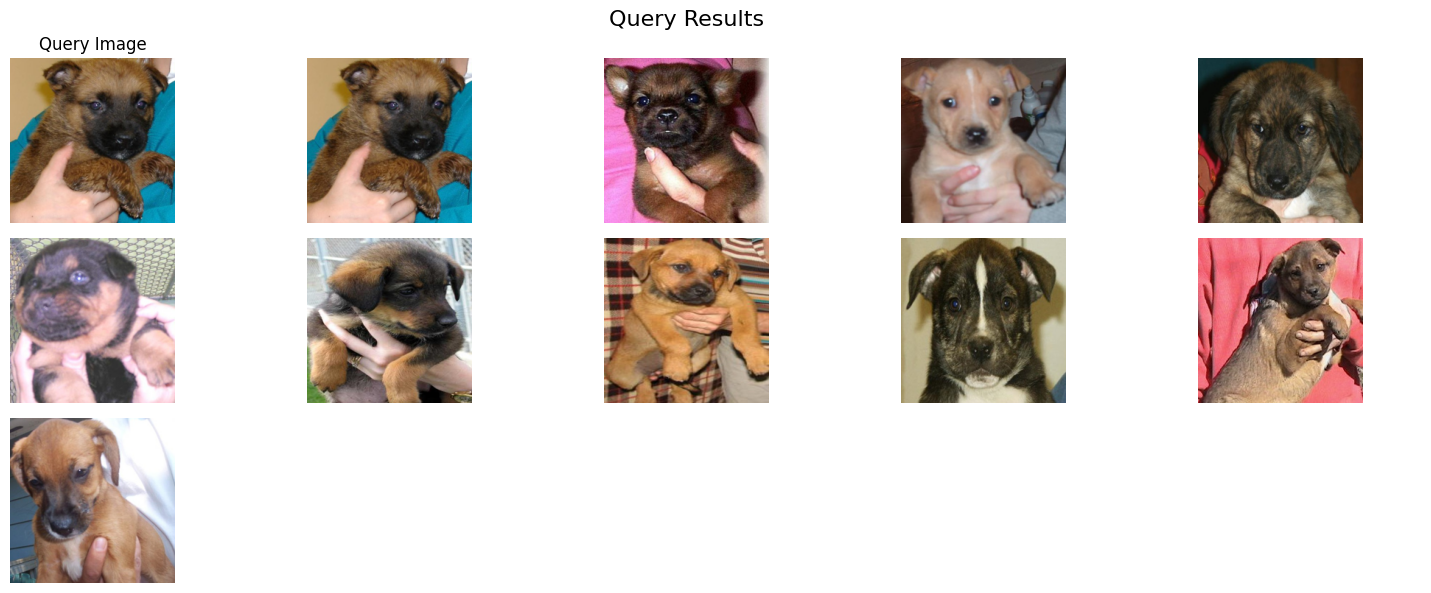

In [105]:
query_img = imgs_to_search[5]
query_img_pil = numpy_to_pil(query_img)

result = collection.query(
    query_images=[query_img],
    n_results=10
)

images_to_display = []
for img_id in result['ids'][0]:
    idx = int(img_id[3:])
    img_array = array_of_images[idx]
    img_pil = numpy_to_pil(img_array)
    images_to_display.append(img_pil)

display_image_grid(query_img_pil, images_to_display, cols=5, title="Query Results")

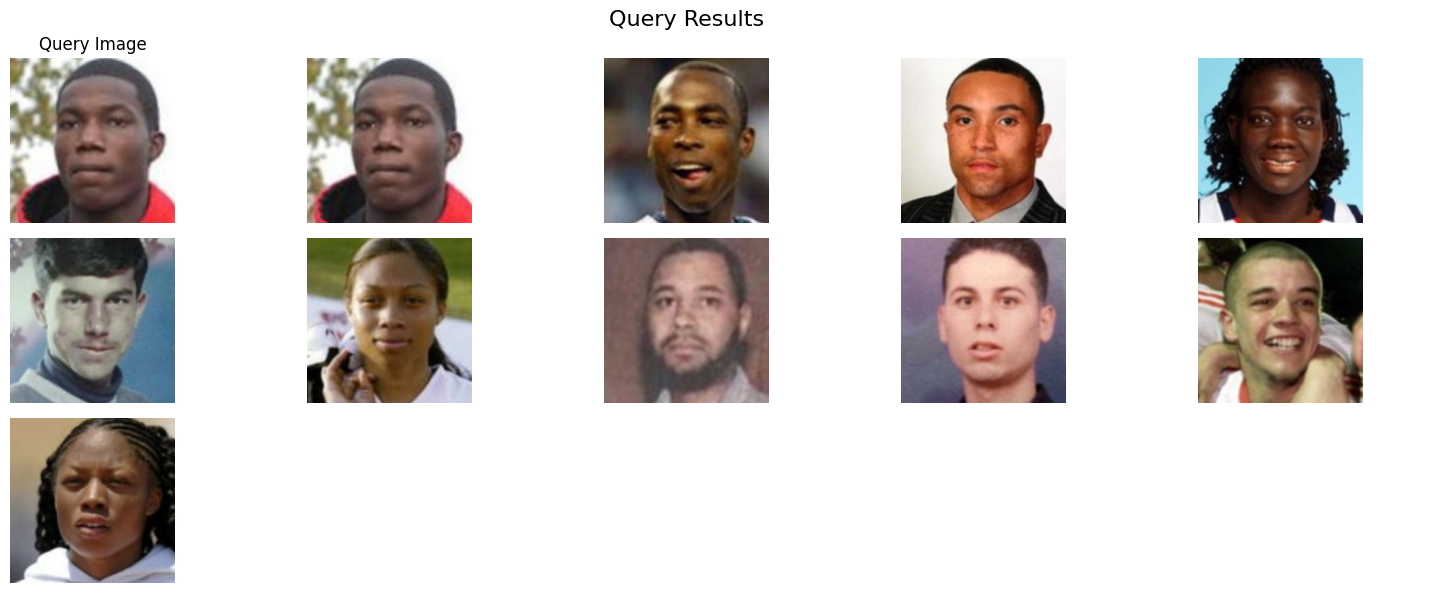

In [106]:
query_img = imgs_to_search[6]
query_img_pil = numpy_to_pil(query_img)

result = collection.query(
    query_images=[query_img],
    n_results=10
)

images_to_display = []
for img_id in result['ids'][0]:
    idx = int(img_id[3:])
    img_array = array_of_images[idx]
    img_pil = numpy_to_pil(img_array)
    images_to_display.append(img_pil)

display_image_grid(query_img_pil, images_to_display, cols=5, title="Query Results")

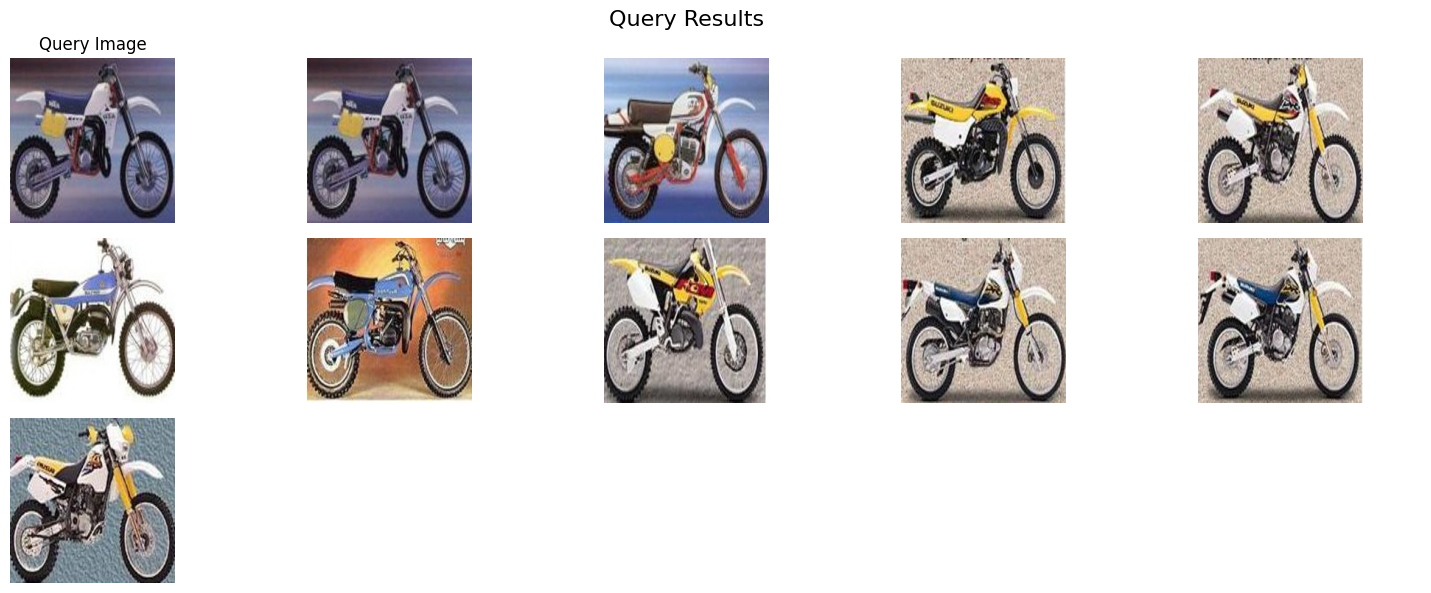

In [107]:
query_img = imgs_to_search[7]
query_img_pil = numpy_to_pil(query_img)

result = collection.query(
    query_images=[query_img],
    n_results=10
)

images_to_display = []
for img_id in result['ids'][0]:
    idx = int(img_id[3:])
    img_array = array_of_images[idx]
    img_pil = numpy_to_pil(img_array)
    images_to_display.append(img_pil)

display_image_grid(query_img_pil, images_to_display, cols=5, title="Query Results")